# Comparative Analysis
In this notebook, we compare Window with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
cost = "normal"
thresholds = np.round(np.arange(.05, 1., .05), 2)

methods = list()

for t in thresholds:
    candidate_name = f"{cost}-cost-{t}-threshold"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/window_cost_threshold/{file_name}")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,normal-cost-0.05-threshold,normal-cost-0.1-threshold,normal-cost-0.15-threshold,normal-cost-0.2-threshold,normal-cost-0.25-threshold,normal-cost-0.3-threshold,normal-cost-0.35-threshold,normal-cost-0.4-threshold,normal-cost-0.45-threshold,normal-cost-0.5-threshold,normal-cost-0.55-threshold,normal-cost-0.6-threshold,normal-cost-0.65-threshold,normal-cost-0.7-threshold,normal-cost-0.75-threshold,normal-cost-0.8-threshold,normal-cost-0.85-threshold,normal-cost-0.9-threshold,normal-cost-0.95-threshold
0,DodgerLoopDay,0.032,0.059,0.058,0.057,0.056,0.042,0.041,0.062,0.062,0.061,0.041,0.049,0.044,0.061,0.067,0.067,0.067,0.066,0.066
1,EEGRat,0.078,0.137,0.248,0.326,0.404,0.528,0.527,0.526,0.531,0.534,0.581,0.597,0.598,0.600,0.600,0.600,0.600,0.602,0.697
2,EEGRat2,0.076,0.184,0.340,0.457,0.558,0.683,0.700,0.914,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
3,FaceFour,0.157,0.200,0.216,0.228,0.413,0.487,0.483,0.488,0.548,0.548,0.574,0.574,0.685,0.685,0.685,0.685,0.684,0.684,0.684
4,GrandMalSeizures2,0.026,0.042,0.081,0.114,0.189,0.194,0.237,0.251,0.294,0.473,0.499,0.565,0.565,0.578,0.582,0.607,0.606,0.606,0.606
5,GreatBarbet1,0.729,0.683,0.688,0.713,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355
6,Herring,0.018,0.016,0.016,0.017,0.028,0.031,0.041,0.067,0.067,0.077,0.147,0.234,0.401,0.425,0.425,0.425,0.446,0.554,0.553
7,InlineSkate,0.038,0.038,0.037,0.039,0.038,0.038,0.040,0.040,0.040,0.040,0.040,0.039,0.043,0.045,0.045,0.048,0.048,0.049,0.049
8,InsectEPG1,0.107,0.289,0.376,0.585,0.764,0.801,0.802,0.822,0.818,0.815,0.815,0.884,0.653,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149


Let's calculate the mean/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3327/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


normal-cost-0.05-threshold    0.203
normal-cost-0.1-threshold     0.212
normal-cost-0.15-threshold    0.260
normal-cost-0.2-threshold     0.299
normal-cost-0.25-threshold    0.321
normal-cost-0.3-threshold     0.351
normal-cost-0.35-threshold    0.371
normal-cost-0.4-threshold     0.393
normal-cost-0.45-threshold    0.385
normal-cost-0.5-threshold     0.384
normal-cost-0.55-threshold    0.374
normal-cost-0.6-threshold     0.387
normal-cost-0.65-threshold    0.399
normal-cost-0.7-threshold     0.416
normal-cost-0.75-threshold    0.414
normal-cost-0.8-threshold     0.416
normal-cost-0.85-threshold    0.417
normal-cost-0.9-threshold     0.422
normal-cost-0.95-threshold    0.427
dtype: float64

In [6]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3327/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


normal-cost-0.05-threshold    0.237
normal-cost-0.1-threshold     0.202
normal-cost-0.15-threshold    0.224
normal-cost-0.2-threshold     0.245
normal-cost-0.25-threshold    0.240
normal-cost-0.3-threshold     0.257
normal-cost-0.35-threshold    0.265
normal-cost-0.4-threshold     0.286
normal-cost-0.45-threshold    0.265
normal-cost-0.5-threshold     0.250
normal-cost-0.55-threshold    0.230
normal-cost-0.6-threshold     0.233
normal-cost-0.65-threshold    0.214
normal-cost-0.7-threshold     0.214
normal-cost-0.75-threshold    0.211
normal-cost-0.8-threshold     0.211
normal-cost-0.85-threshold    0.212
normal-cost-0.9-threshold     0.214
normal-cost-0.95-threshold    0.219
dtype: float64

Let's compute the wins per method.

In [7]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [8]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

normal-cost-0.05-threshold:wins=7 rank=12.19048
normal-cost-0.1-threshold:wins=4 rank=11.61905
normal-cost-0.15-threshold:wins=4 rank=11.33333
normal-cost-0.2-threshold:wins=5 rank=9.71429
normal-cost-0.25-threshold:wins=5 rank=8.47619
normal-cost-0.3-threshold:wins=5 rank=8.0
normal-cost-0.35-threshold:wins=5 rank=6.90476
normal-cost-0.4-threshold:wins=7 rank=5.38095
normal-cost-0.45-threshold:wins=6 rank=5.2381
normal-cost-0.5-threshold:wins=5 rank=5.19048
normal-cost-0.55-threshold:wins=4 rank=5.90476
normal-cost-0.6-threshold:wins=5 rank=5.66667
normal-cost-0.65-threshold:wins=5 rank=5.28571
normal-cost-0.7-threshold:wins=5 rank=4.38095
normal-cost-0.75-threshold:wins=6 rank=3.95238
normal-cost-0.8-threshold:wins=7 rank=3.66667
normal-cost-0.85-threshold:wins=5 rank=3.66667
normal-cost-0.9-threshold:wins=6 rank=3.57143
normal-cost-0.95-threshold:wins=8 rank=3.47619


Let's plot and output the ranks.

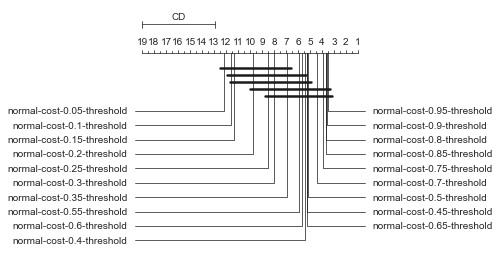

In [9]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, ranks.columns, cd=cd, reverse=True, width=5,
                                      filename=f"../../figures/cd_ablation_window_{cost}_threshold.pdf")

Let's compute pairwise wins/losses.

In [10]:
selection = "normal-cost-0.95-threshold"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

normal-cost-0.95-threshold vs normal-cost-0.05-threshold: (wins/ties/losses): 13/4/4
normal-cost-0.95-threshold vs normal-cost-0.1-threshold: (wins/ties/losses): 13/6/2
normal-cost-0.95-threshold vs normal-cost-0.15-threshold: (wins/ties/losses): 13/6/2
normal-cost-0.95-threshold vs normal-cost-0.2-threshold: (wins/ties/losses): 12/6/3
normal-cost-0.95-threshold vs normal-cost-0.25-threshold: (wins/ties/losses): 10/7/4
normal-cost-0.95-threshold vs normal-cost-0.3-threshold: (wins/ties/losses): 10/7/4
normal-cost-0.95-threshold vs normal-cost-0.35-threshold: (wins/ties/losses): 9/7/5
normal-cost-0.95-threshold vs normal-cost-0.4-threshold: (wins/ties/losses): 8/7/6
normal-cost-0.95-threshold vs normal-cost-0.45-threshold: (wins/ties/losses): 8/9/4
normal-cost-0.95-threshold vs normal-cost-0.5-threshold: (wins/ties/losses): 8/10/3
normal-cost-0.95-threshold vs normal-cost-0.55-threshold: (wins/ties/losses): 8/11/2
normal-cost-0.95-threshold vs normal-cost-0.6-threshold: (wins/ties/losse

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3327/2574710515.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3327/2574710515.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


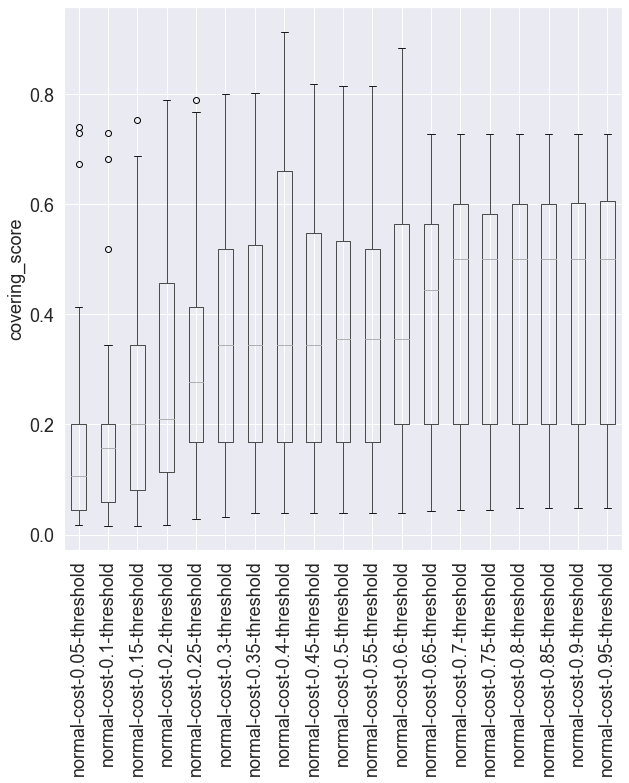

In [11]:
fontsize = 18
_, ax = plt.subplots(figsize=(10, 10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../../figures/bp_ablation_window_{cost}_threshold.pdf", bbox_inches="tight") 